### Importing Libraries

In [101]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras import models
import matplotlib.pyplot as plt
import json

### Importing Dataset

In [102]:
df = pd.read_csv('/content/drive/MyDrive/DL/dataset/B_train.csv', infer_datetime_format=True,
                parse_dates={'dt' : ['Unnamed: 0']},
                 index_col='dt')

In [103]:
df2 = pd.read_csv('/content/drive/MyDrive/DL/dataset/B_test.csv', infer_datetime_format=True,
                parse_dates={'dt' : ['Unnamed: 0']},
                 index_col='dt')

### Initial Pre-processing

In [104]:
train_data = np.asarray(df)
test_data = np.asarray(df2)

In [105]:
train_data.shape

(7007, 12)

In [205]:
hell = train_data[len(train_data)-24:].tolist()

In [206]:
with open("sample_b.json", "w") as outfile:
    json.dump(hell, outfile)

NameError: ignored

In [106]:
def create_training_sequence(data, sequence_length, step_size):
    sequences = []
    targets = []
    for i in range(0, len(data) - sequence_length-step_size):
        seq = data[i:i+sequence_length]
        target = data[i+sequence_length:i + sequence_length + step_size, 11]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

In [107]:
def create_test_sequence(data, sequence_length, step_size):
    hell = train_data[len(train_data)-sequence_length:].tolist()
    well = test_data[:step_size, 11].tolist()
    a = hell.copy()
    b = well.copy()
    sequences = [a.copy()]
    targets = [b.copy()]
    for i in range(0, len(data) - step_size):
        a.append(data[i].tolist())
        a.pop(0)
        b.append(data[i+step_size, 11].tolist())
        b.pop(0)
        sequences.append(a.copy())
        targets.append(b.copy())
    return np.array(sequences), np.array(targets)

### Step-size: 1

#### Pre-processing

In [114]:
time_step_1 = 1
sequence_length_1 = 24
X_train_1, y_train_1 = create_training_sequence(train_data, sequence_length_1, time_step_1)

In [115]:
X_train_1.shape, y_train_1.shape

((6982, 24, 12), (6982, 1))

In [116]:
X_test_1, y_test_1 = create_test_sequence(test_data, sequence_length_1, time_step_1)

In [117]:
X_test_1.shape, y_test_1.shape

((1729, 24, 12), (1729, 1))

#### Training the model

In [127]:
model_1 = Sequential()
model_1.add(LSTM(units=50, activation='relu', input_shape=(sequence_length_1, X_train_1.shape[2])))
model_1.add(Dropout(0.2))
model_1.add(Dense(units=time_step_1))

In [128]:
model_1.compile(optimizer='adam', loss='mean_squared_error')

In [129]:
model_1.fit(X_train_1, y_train_1, epochs=50, batch_size=32)

Epoch 1/50
219/219 [==============================] - 6s 20ms/step - loss: 13575.2021
Epoch 2/50
219/219 [==============================] - 3s 15ms/step - loss: 6945.3066
Epoch 3/50
219/219 [==============================] - 3s 13ms/step - loss: 3613.4963
Epoch 4/50
219/219 [==============================] - 3s 13ms/step - loss: 2964.9150
Epoch 5/50
219/219 [==============================] - 3s 13ms/step - loss: 4169.5464
Epoch 6/50
219/219 [==============================] - 4s 20ms/step - loss: 15757.0244
Epoch 7/50
219/219 [==============================] - 4s 18ms/step - loss: 6084.5557
Epoch 8/50
219/219 [==============================] - 3s 13ms/step - loss: 4464.9766
Epoch 9/50
219/219 [==============================] - 3s 13ms/step - loss: 3964.4424
Epoch 10/50
219/219 [==============================] - 3s 12ms/step - loss: 3992.2729
Epoch 11/50
219/219 [==============================] - 4s 17ms/step - loss: 7186.0342
Epoch 12/50
219/219 [==============================] - 4s 19m

#### Testing the mode

In [135]:
y_pred_1 = model_1.predict(X_test_1)

55/55 [==============================] - 0s 5ms/step


In [136]:
y_test_1.shape, y_pred_1.shape

((1729, 1), (1729, 1))

In [137]:
mse_1 = mean_squared_error(y_test_1, y_pred_1)
mae_1 = mean_absolute_error(y_test_1, y_pred_1)

In [138]:
print(f'Mean Squared Error: {mse_1}')
print(f'Mean Absolute Error: {mae_1}')

Mean Squared Error: 1249.6264273855602
Mean Absolute Error: 21.85729994699402


#### Visualizing y_pred vs y_test

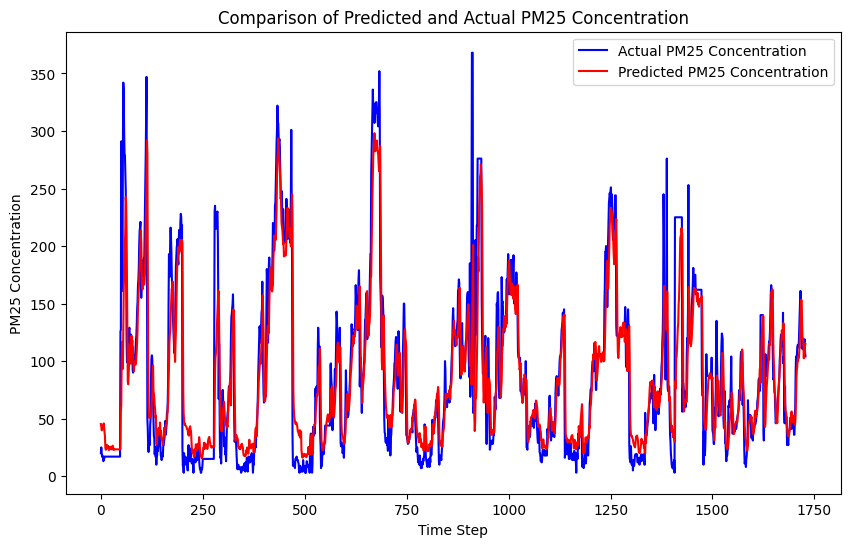

In [134]:
# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(y_test_1, label='Actual PM25 Concentration', color='blue')
plt.plot(y_pred_1, label='Predicted PM25 Concentration', color='red')
plt.title('Comparison of Predicted and Actual PM25 Concentration')
plt.xlabel('Time Step')
plt.ylabel('PM25 Concentration')
plt.legend()
plt.show()

#### saving/loading the model

In [139]:
model_1.save("/content/drive/MyDrive/DL/B_model_1")

In [140]:
loaded_model_1 = models.load_model("/content/drive/MyDrive/DL/B_model_1")

### Step-size: 7

#### Pre-processing

In [141]:
time_step_7 = 7
sequence_length_7 = 24
X_train_7, y_train_7 = create_training_sequence(train_data, sequence_length_7, time_step_7)

In [142]:
X_train_7.shape, y_train_7.shape

((6976, 24, 12), (6976, 7))

In [143]:
X_test_7, y_test_7 = create_test_sequence(test_data, sequence_length_7, time_step_7)

In [144]:
X_test_7.shape, y_test_7.shape

((1723, 24, 12), (1723, 7))

#### Training the model

In [147]:
model_7 = Sequential()
model_7.add(LSTM(units=50, activation='relu', input_shape=(sequence_length_7, X_train_7.shape[2])))
model_7.add(Dropout(0.2))
model_7.add(Dense(units=time_step_7))
model_7.compile(optimizer='adam', loss='mean_squared_error')
model_7.fit(X_train_7, y_train_7, epochs=100, batch_size=32)

Epoch 1/100
218/218 [==============================] - 4s 12ms/step - loss: 12340.5879
Epoch 2/100
218/218 [==============================] - 3s 13ms/step - loss: 5674.5996
Epoch 3/100
218/218 [==============================] - 4s 18ms/step - loss: 9072.3105
Epoch 4/100
218/218 [==============================] - 6s 29ms/step - loss: 9690.5107
Epoch 5/100
218/218 [==============================] - 4s 20ms/step - loss: 9704.7959
Epoch 6/100
218/218 [==============================] - 3s 13ms/step - loss: 7617.5620
Epoch 7/100
218/218 [==============================] - 3s 15ms/step - loss: 7011.6270
Epoch 8/100
218/218 [==============================] - 4s 18ms/step - loss: 4258.9683
Epoch 9/100
218/218 [==============================] - 6s 30ms/step - loss: 4003.3494
Epoch 10/100
218/218 [==============================] - 5s 22ms/step - loss: 3801.1255
Epoch 11/100
218/218 [==============================] - 5s 21ms/step - loss: 3738.8110
Epoch 12/100
218/218 [=============================

#### Testing the model

In [148]:
y_pred_7 = model_7.predict(X_test_7)

54/54 [==============================] - 0s 4ms/step


In [149]:
y_test_7.shape, y_pred_7.shape

((1723, 7), (1723, 7))

In [150]:
mse_7 = mean_squared_error(y_test_7, y_pred_7)
mae_7 = mean_absolute_error(y_test_7, y_pred_7)

In [151]:
print(f'Mean Squared Error: {mse_7}')
print(f'Mean Absolute Error: {mae_7}')

Mean Squared Error: 2047.5699365525395
Mean Absolute Error: 28.458937031328656


#### Visualizing y_pred vs y_test

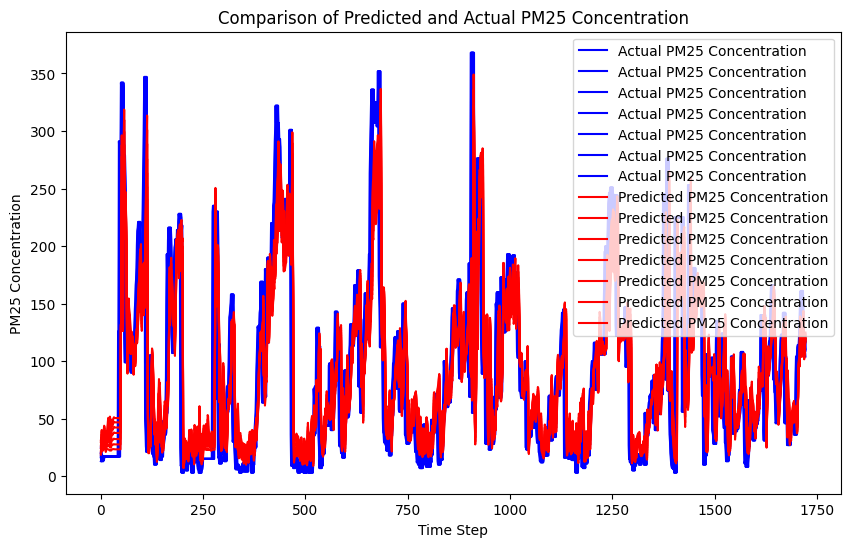

In [152]:
# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(y_test_7, label='Actual PM25 Concentration', color='blue')
plt.plot(y_pred_7, label='Predicted PM25 Concentration', color='red')
plt.title('Comparison of Predicted and Actual PM25 Concentration')
plt.xlabel('Time Step')
plt.ylabel('PM25 Concentration')
plt.legend()
plt.show()

#### saving/loading the model

In [153]:
model_7.save("/content/drive/MyDrive/DL/B_model_7")

In [154]:
loaded_model_7 = models.load_model("/content/drive/MyDrive/DL/B_model_7")

### Step-size: 14

#### Pre-processing

In [155]:
time_step_14 = 14
sequence_length_14 = 24
X_train_14, y_train_14 = create_training_sequence(train_data, sequence_length_14, time_step_14)

In [156]:
X_train_14.shape, y_train_14.shape

((6969, 24, 12), (6969, 14))

In [157]:
X_test_14, y_test_14 = create_test_sequence(test_data, sequence_length_14, time_step_14)

In [158]:
X_test_14.shape, y_test_14.shape

((1716, 24, 12), (1716, 14))

#### Training the model

In [159]:
model_14 = Sequential()
model_14.add(LSTM(units=50, activation='relu', input_shape=(sequence_length_14, X_train_14.shape[2])))
model_14.add(Dropout(0.2))
model_14.add(Dense(units=time_step_14))
model_14.compile(optimizer='adam', loss='mean_squared_error')
model_14.fit(X_train_14, y_train_14, epochs=100, batch_size=32)

Epoch 1/100
218/218 [==============================] - 6s 19ms/step - loss: 11359.9619
Epoch 2/100
218/218 [==============================] - 3s 14ms/step - loss: 12160.0957
Epoch 3/100
218/218 [==============================] - 3s 14ms/step - loss: 7962.6470
Epoch 4/100
218/218 [==============================] - 3s 13ms/step - loss: 6265.0361
Epoch 5/100
218/218 [==============================] - 3s 15ms/step - loss: 6382.2100
Epoch 6/100
218/218 [==============================] - 4s 21ms/step - loss: 5903.0620
Epoch 7/100
218/218 [==============================] - 4s 18ms/step - loss: 5242.3882
Epoch 8/100
218/218 [==============================] - 3s 13ms/step - loss: 5345.2334
Epoch 9/100
218/218 [==============================] - 3s 13ms/step - loss: 6422.0713
Epoch 10/100
218/218 [==============================] - 3s 13ms/step - loss: 6150.7964
Epoch 11/100
218/218 [==============================] - 4s 20ms/step - loss: 5766.2646
Epoch 12/100
218/218 [============================

#### Testing the model

In [160]:
y_pred_14 = model_14.predict(X_test_14)

54/54 [==============================] - 1s 6ms/step


In [161]:
y_test_14.shape, y_pred_14.shape

((1716, 14), (1716, 14))

In [162]:
mse_14 = mean_squared_error(y_test_14, y_pred_14)
mae_14 = mean_absolute_error(y_test_14, y_pred_14)

In [163]:
print(f'Mean Squared Error: {mse_14}')
print(f'Mean Absolute Error: {mae_14}')

Mean Squared Error: 3162.3310951302738
Mean Absolute Error: 39.42053731564399


#### Visualizing y_pred vs y_test

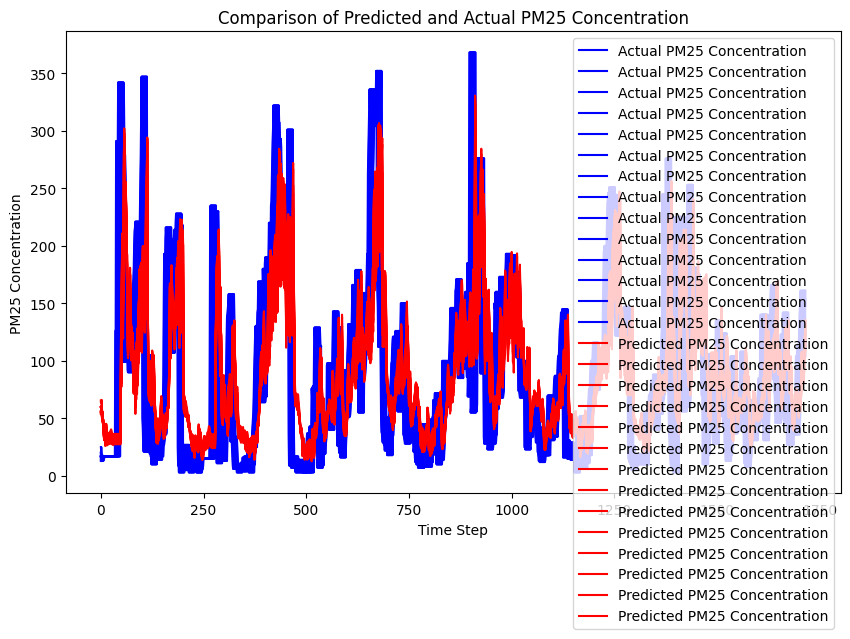

In [164]:
# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(y_test_14, label='Actual PM25 Concentration', color='blue')
plt.plot(y_pred_14, label='Predicted PM25 Concentration', color='red')
plt.title('Comparison of Predicted and Actual PM25 Concentration')
plt.xlabel('Time Step')
plt.ylabel('PM25 Concentration')
plt.legend()
plt.show()

#### saving/loading the model

In [165]:
model_14.save("/content/drive/MyDrive/DL/B_model_14")

In [166]:
loaded_model_14 = models.load_model("/content/drive/MyDrive/DL/B_model_14")

### Step-size: 30

#### Pre-processing

In [167]:
time_step_30 = 30
sequence_length_30 = 24
X_train_30, y_train_30 = create_training_sequence(train_data, sequence_length_30, time_step_30)

In [168]:
X_train_30.shape, y_train_30.shape

((6953, 24, 12), (6953, 30))

In [169]:
X_test_30, y_test_30 = create_test_sequence(test_data, sequence_length_30, time_step_30)

In [170]:
X_test_30.shape, y_test_30.shape

((1700, 24, 12), (1700, 30))

#### Training the model

In [171]:
model_30= Sequential()
model_30.add(LSTM(units=50, activation='relu', input_shape=(sequence_length_30, X_train_30.shape[2])))
model_30.add(Dropout(0.2))
model_30.add(Dense(units=time_step_30))
model_30.compile(optimizer='adam', loss='mean_squared_error')
model_30.fit(X_train_30, y_train_30, epochs=100, batch_size=32)

Epoch 1/100
218/218 [==============================] - 6s 20ms/step - loss: 10724.1260
Epoch 2/100
218/218 [==============================] - 4s 19ms/step - loss: 8493.9189
Epoch 3/100
218/218 [==============================] - 3s 12ms/step - loss: 8964.9736
Epoch 4/100
218/218 [==============================] - 3s 13ms/step - loss: 7342.0591
Epoch 5/100
218/218 [==============================] - 3s 13ms/step - loss: 6929.6167
Epoch 6/100
218/218 [==============================] - 4s 18ms/step - loss: 6683.2036
Epoch 7/100
218/218 [==============================] - 5s 21ms/step - loss: 6418.9287
Epoch 8/100
218/218 [==============================] - 3s 14ms/step - loss: 6369.7988
Epoch 9/100
218/218 [==============================] - 3s 13ms/step - loss: 6251.1802
Epoch 10/100
218/218 [==============================] - 3s 14ms/step - loss: 6300.8110
Epoch 11/100
218/218 [==============================] - 3s 15ms/step - loss: 8431.2500
Epoch 12/100
218/218 [=============================

#### Testing the model

In [176]:
y_pred_30 = model_30.predict(X_test_30)

54/54 [==============================] - 0s 6ms/step


In [177]:
y_test_30.shape, y_pred_30.shape

((1700, 30), (1700, 30))

In [178]:
mse_30 = mean_squared_error(y_test_30, y_pred_30)
mae_30 = mean_absolute_error(y_test_30, y_pred_30)

In [179]:
print(f'Mean Squared Error: {mse_30}')
print(f'Mean Absolute Error: {mae_30}')

Mean Squared Error: 4218.2972843881325
Mean Absolute Error: 47.03788681251863


#### Visualizing y_pred vs y_test

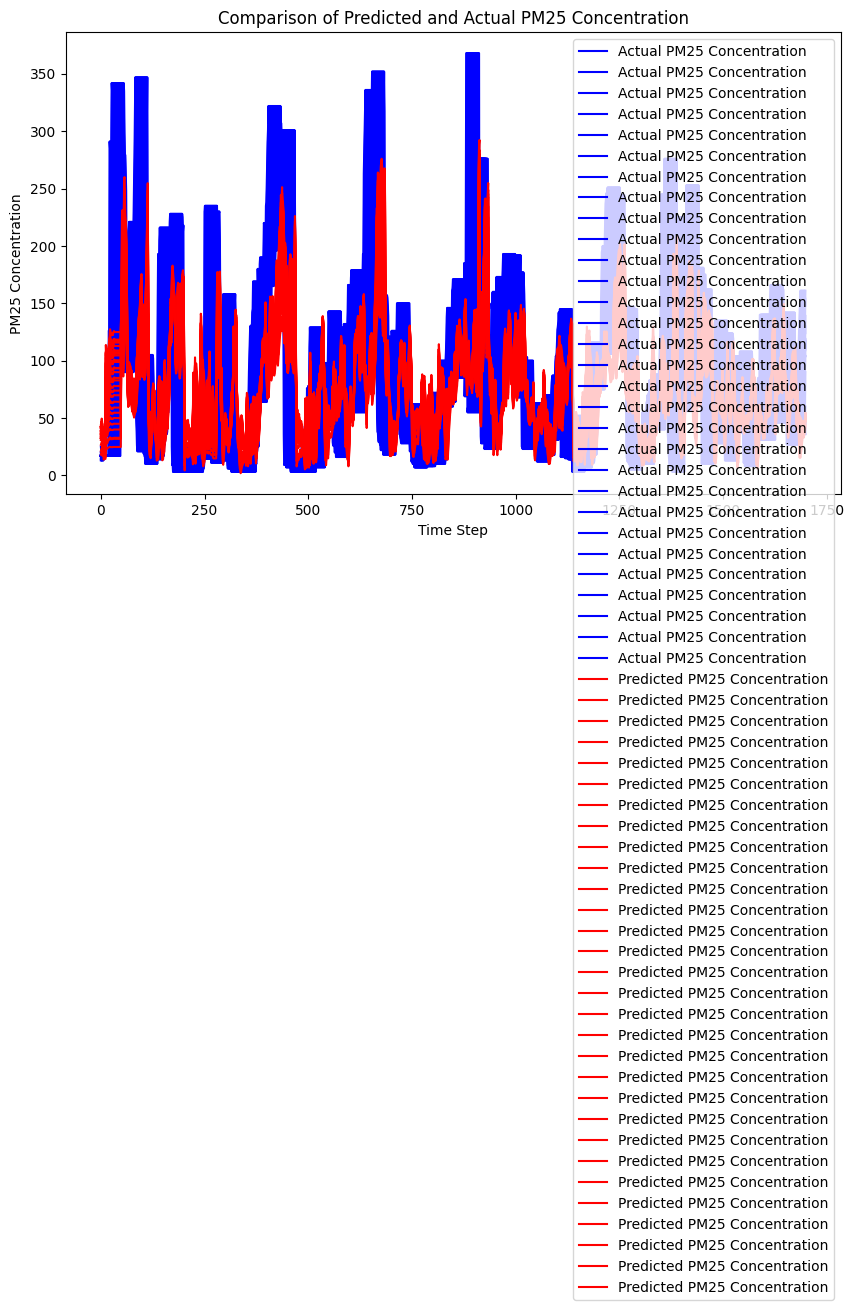

In [181]:
# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(y_test_30, label='Actual PM25 Concentration', color='blue')
plt.plot(y_pred_30, label='Predicted PM25 Concentration', color='red')
plt.title('Comparison of Predicted and Actual PM25 Concentration')
plt.xlabel('Time Step')
plt.ylabel('PM25 Concentration')
plt.legend()
plt.show()

#### saving/loading the model

In [182]:
model_30.save("/content/drive/MyDrive/DL/B_model_30")

In [183]:
loaded_model_30 = models.load_model("/content/drive/MyDrive/DL/B_model_30")

### Step-size: 60

#### Pre-processing

In [184]:
time_step_60 = 60
sequence_length_60 = 24
X_train_60, y_train_60 = create_training_sequence(train_data, sequence_length_60, time_step_60)

In [185]:
X_train_60.shape, y_train_60.shape

((6923, 24, 12), (6923, 60))

In [186]:
X_test_60, y_test_60 = create_test_sequence(test_data, sequence_length_60, time_step_60)

In [187]:
X_test_60.shape, y_test_60.shape

((1670, 24, 12), (1670, 60))

#### Training the model

In [204]:
model_60 = Sequential()
model_60.add(LSTM(units=50, activation='relu', input_shape=(sequence_length_60, X_train_60.shape[2])))
model_60.add(Dropout(0.2))
model_60.add(Dense(units=time_step_60))
model_60.compile(optimizer='adam', loss='mean_squared_error')
model_60.fit(X_train_60, y_train_60, epochs=30, batch_size=32)

Epoch 1/30
217/217 [==============================] - 6s 17ms/step - loss: 12109.7012
Epoch 2/30
217/217 [==============================] - 4s 19ms/step - loss: 8853.3135
Epoch 3/30
217/217 [==============================] - 3s 14ms/step - loss: 8291.8701
Epoch 4/30
217/217 [==============================] - 3s 12ms/step - loss: 7779.4229
Epoch 5/30
217/217 [==============================] - 3s 12ms/step - loss: 7244.5918
Epoch 6/30
217/217 [==============================] - 3s 14ms/step - loss: 7595.9810
Epoch 7/30
217/217 [==============================] - 4s 19ms/step - loss: 9011.5850
Epoch 8/30
217/217 [==============================] - 4s 18ms/step - loss: 7945.0410
Epoch 9/30
217/217 [==============================] - 3s 13ms/step - loss: 7304.3804
Epoch 10/30
217/217 [==============================] - 3s 13ms/step - loss: 7417.1221
Epoch 11/30
217/217 [==============================] - 3s 13ms/step - loss: 7050.3647
Epoch 12/30
217/217 [==============================] - 4s 18ms

#### Testing the model

In [207]:
y_pred_60 = model_60.predict(X_test_60)

53/53 [==============================] - 0s 5ms/step


In [208]:
y_test_60.shape, y_pred_60.shape

((1670, 60), (1670, 60))

In [209]:
mse_60 = mean_squared_error(y_test_60, y_pred_60)
mae_60 = mean_absolute_error(y_test_60, y_pred_60)

In [210]:
print(f'Mean Squared Error: {mse_60}')
print(f'Mean Absolute Error: {mae_60}')

Mean Squared Error: 4813.049321020322
Mean Absolute Error: 53.58896590709626


#### Visualizing y_pred vs y_test

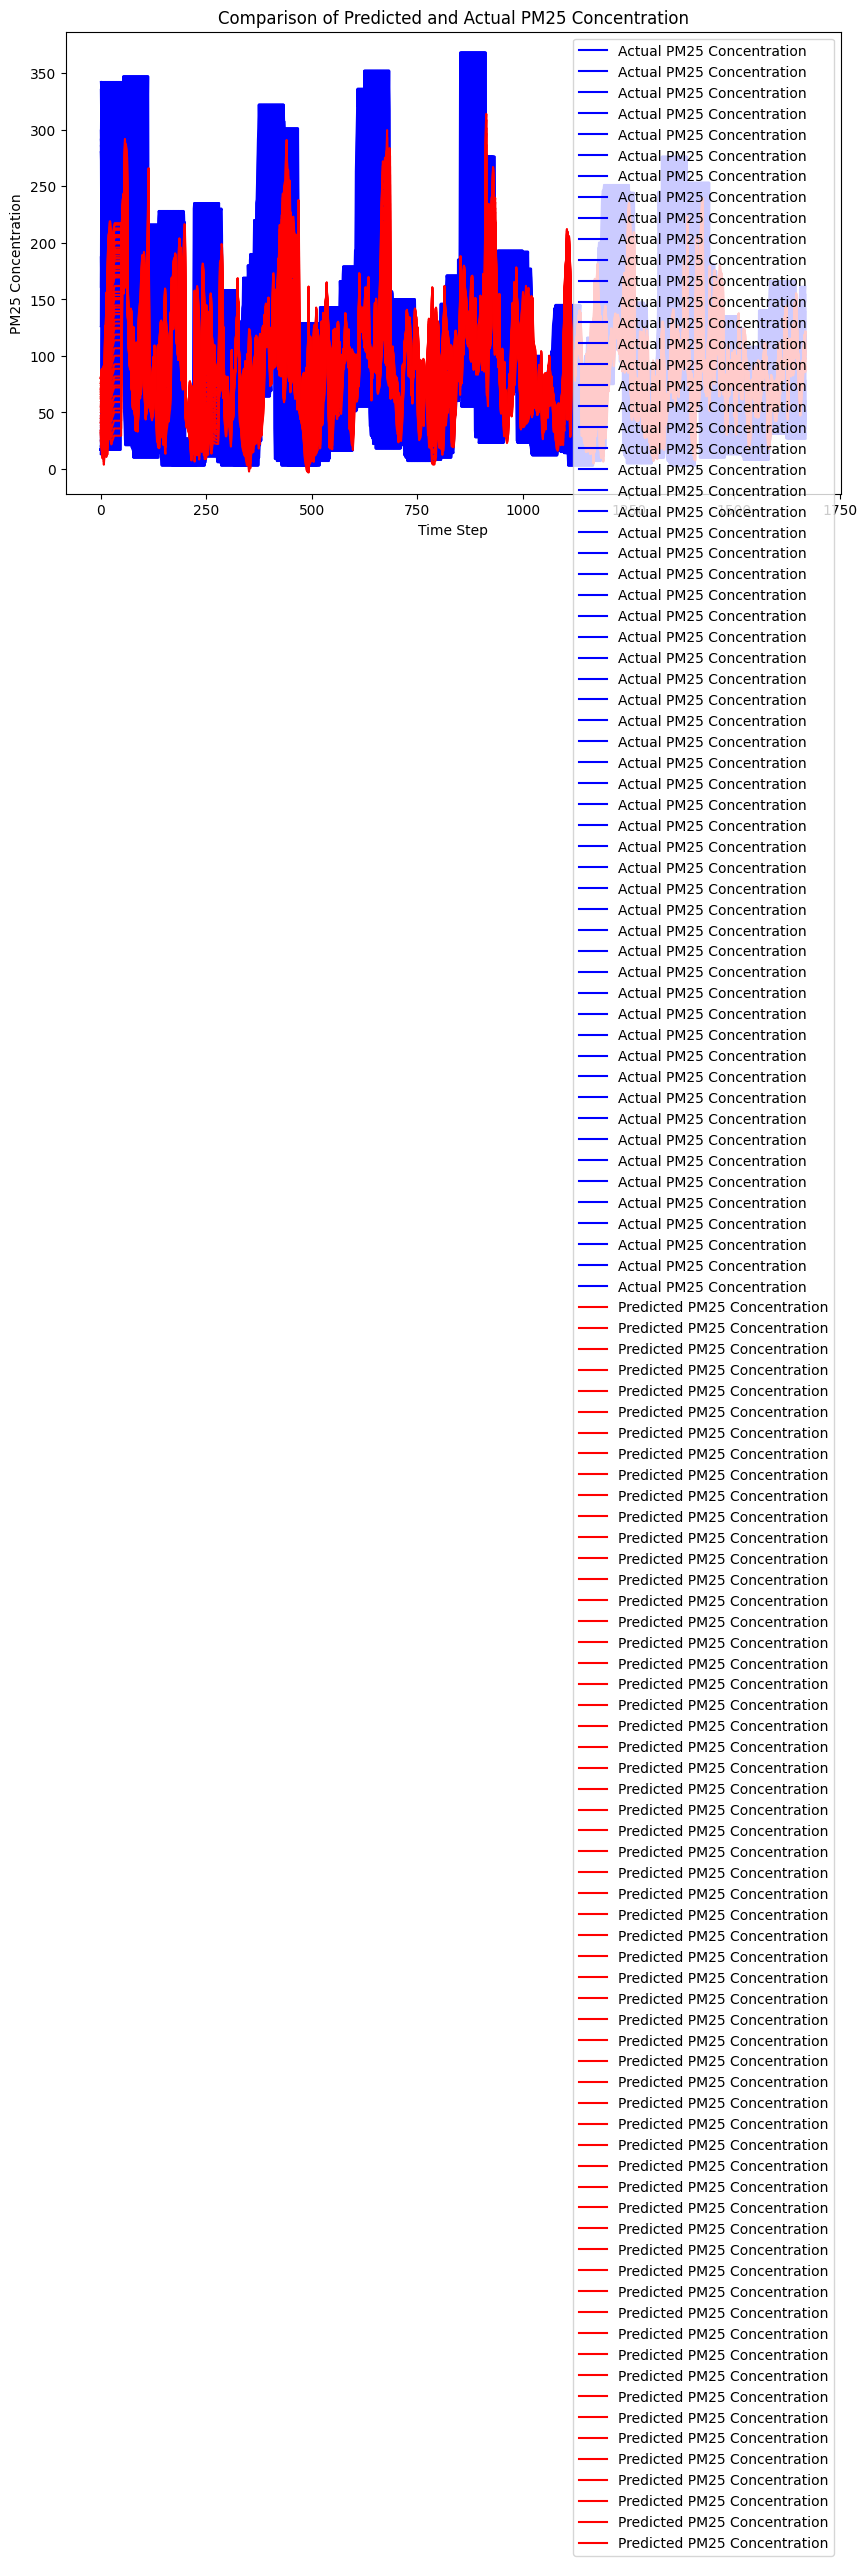

In [211]:
# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(y_test_60, label='Actual PM25 Concentration', color='blue')
plt.plot(y_pred_60, label='Predicted PM25 Concentration', color='red')
plt.title('Comparison of Predicted and Actual PM25 Concentration')
plt.xlabel('Time Step')
plt.ylabel('PM25 Concentration')
plt.legend()
plt.show()

#### saving/loading the model

In [212]:
model_60.save("/content/drive/MyDrive/DL/B_model_60")

In [213]:
loaded_model_60 = models.load_model("/content/drive/MyDrive/DL/B_model_60")